Evaluation metrics:

  - Linear Regression
      - Mean Square Error (MSE)
      - Mean Absolute Error (MAE)
      - Root Mean Squared Error (RMSE)
      - Coefficient of Determination (R-squared)

  - Logistic Regression
      - Accuracy
      - Precision
      - Recall
      - F1 Score


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, r2_score, precision_score, recall_score, f1_score, accuracy_score

In [3]:
housing = fetch_california_housing()

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
housing_data = pd.DataFrame(housing.data, columns = housing.feature_names)
housing_data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
housing_target = pd.DataFrame(housing.target, columns = housing.target_names)
housing_target.head(5)

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [8]:
housing_data = pd.concat([housing_data, housing_target], axis=1)
housing_data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


All attributes are numerical. No null values.

MedHouseVal is the housing price, which we need to predict.

In [10]:
# Correlation

# computing standard correlation coefficient
corr_matrix = housing_data.corr()

# fetch attributes correlate with the median housing value
cor_coef = corr_matrix["MedHouseVal"].sort_values(ascending = False)
# correlation coefficient
cor_coef

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


Positive correlation:

  MedHouseVal tends to go up when MedInc increases.

  MedInc is an important attribute to predict MedHouseVal.

Negative correlation:

  MedHouseVal has a slight tendency to go down when we go north /Latitude/.

TRAIN-TEST SPLIT

train_test_split() - The housing dataset is small and  method may result in sampling bias.

stratified sampling - the right number of instances are sampled from each stratum to ensure that the test set represents the entire population

array([[<Axes: title={'center': 'MedInc'}>]], dtype=object)

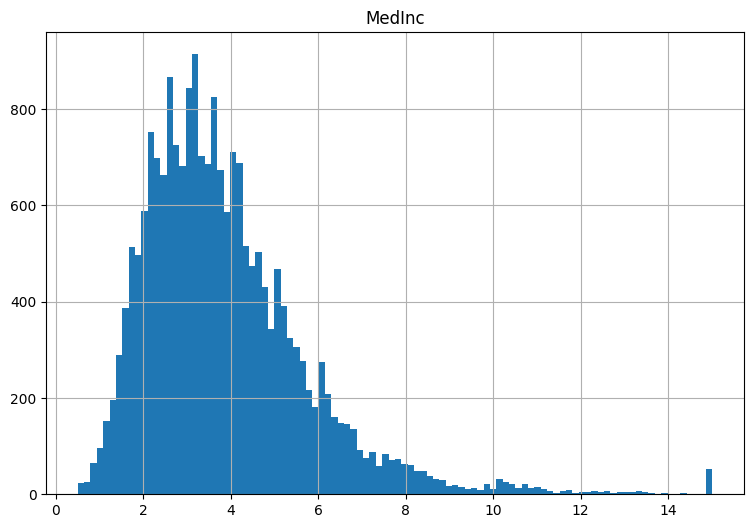

In [11]:
# MedInc histogram
#housing_data["MedInc"].hist(bins = 100, figsize = (9, 6))
housing_data.hist(column = "MedInc", bins = 100, figsize = (9, 6))

 Most median income values are clustered around 1.5 to 6.

In [12]:
# create an income category attribute
# category 1 ranges from 0 to 1.5 (i.e., less than $15,000)
# category 2 ranges from 1.5 to 3.0
# category 3 ranges from 3.0 to 4.5
# category 4 ranges from 4.5 to 6.0
# category 5 ranges from 6.0 to inf

housing_data["Inc_Category"] = pd.cut(housing_data["MedInc"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])
housing_data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Inc_Category
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,5
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,5
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,5
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3


<Axes: >

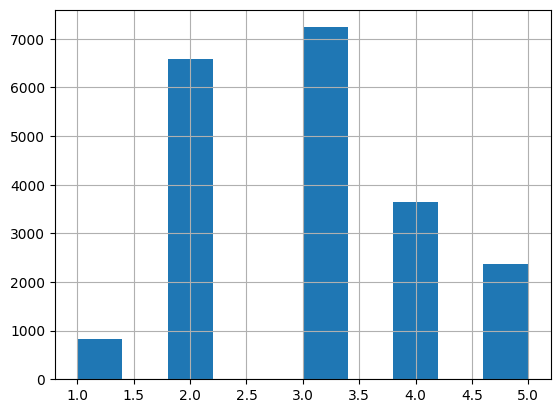

In [13]:
# Inc_Category histogram
housing_data["Inc_Category"].hist()

In [14]:
housing_selected = housing_data[['MedInc', 'MedHouseVal', 'Inc_Category']]
housing_selected.head(5)

,MedInc,MedHouseVal,Inc_Category
0,8.3252,4.526,5
1,8.3014,3.585,5
2,7.2574,3.521,5
3,5.6431,3.413,4
4,3.8462,3.422,3


In [15]:
#stratified sampling

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
housing_split = split.split(housing_selected, housing_selected["Inc_Category"])
# get train and test dataset
for train_index, test_index in housing_split:
    train_set = housing_selected.loc[train_index]
    test_set = housing_selected.loc[test_index]

# drop income_category from train and test dataset
# Inc_Category is used only to split the dataset
for set_ in (train_set, test_set):
    set_.drop("Inc_Category", axis=1, inplace=True)

In [16]:
train_set

,MedInc,MedHouseVal
12655,2.1736,0.721
15502,6.3373,2.796
2908,2.8750,0.827
14053,2.2264,1.125
20496,4.4964,2.383
...,...,...
15174,5.0900,2.685
12661,2.8139,0.904
19263,3.1797,1.404
19140,4.1964,2.581


In [17]:
test_set

,MedInc,MedHouseVal
5241,8.2816,5.00001
17352,5.0099,1.62500
3505,4.3839,2.04600
7777,3.2708,1.59700
14155,4.3529,1.84000
...,...,...
12182,2.8170,1.10000
7275,2.1615,1.18800
17223,4.7000,2.93800
10786,4.9125,3.35700


In [18]:
# drop median_house_value from training data
housing_tr = train_set.drop("MedHouseVal", axis=1)
housing_tr.head(2)

,MedInc
12655,2.1736
15502,6.3373


In [19]:
# create a new dataframe with median_house_value
housing_labels = train_set["MedHouseVal"].copy()
housing_labels.head(2)

,MedHouseVal
12655,0.721
15502,2.796


In [20]:
# test set and target
housing_test = test_set.drop("MedHouseVal", axis=1)
housing_lbl_test = test_set["MedHouseVal"].copy()

## REGRESSION

In [28]:
# Evaluation of regression models to analyze
def linear_evaluation(housing_labels, predicted_data):
  # mean absolute error - the average of the absolute difference between the actual and predicted values.
  # It measures the average of the residuals in the dataset.
  mae = mean_absolute_error(housing_labels, predicted_data)

  # mean squared error - the average of the squared difference between the original and predicted values in the data set.
  # It measures the variance of the residuals.
  mse = mean_squared_error(housing_labels, predicted_data)

  # root mean squared error - the square root of Mean Squared error.
  # It measures the standard deviation of residuals.
  rmse = np.sqrt(mse)

  # coefficient of determination /R-squared/ - represents the proportion of the variance in the dependent variable which is explained by the linear regression model.
  reg_score = r2_score(housing_labels, predicted_data)

  print("Mean absolute error : ", mae)
  print("Mean squared error : ", mse)
  print("Root mean squared error : ", rmse)
  print("R-squared : ", reg_score)

Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

# linear regression model
lin_reg = LinearRegression()
lin_reg.fit(housing_tr, housing_labels)

# predict the price
predicted_lin_reg = lin_reg.predict(housing_test)

Decision Tree Regression

In [23]:
from sklearn.tree import DecisionTreeRegressor

# Decision tree regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_tr, housing_labels)

# predict the price
predicted_tree_reg = tree_reg.predict(housing_test)

Random Forest Regression

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_tr, housing_labels)

# predict the price
predicted_forest_reg = forest_reg.predict(housing_test)

Evaluation

In [25]:
linear_evaluation(housing_lbl_test, predicted_lin_reg)

Mean absolute error :  0.6185663069397769
Mean squared error :  0.6794870325165892
Root mean squared error :  0.8243100342204923
R-squared :  0.4786471230995253


In [26]:
linear_evaluation(housing_lbl_test, predicted_tree_reg)

Mean absolute error :  0.7870776138912334
Mean squared error :  1.1488641687605166
Root mean squared error :  1.071850814600855
R-squared :  0.1185061511287272


In [27]:
linear_evaluation(housing_lbl_test, predicted_forest_reg)

Mean absolute error :  0.7106495570620743
Mean squared error :  0.910946370828505
Root mean squared error :  0.9544351056140512
R-squared :  0.30105434186944124


## CLASSIFICATION

In [31]:
housing_selected

,MedInc,MedHouseVal,Inc_Category
0,8.3252,4.526,5
1,8.3014,3.585,5
2,7.2574,3.521,5
3,5.6431,3.413,4
4,3.8462,3.422,3
...,...,...,...
20635,1.5603,0.781,2
20636,2.5568,0.771,2
20637,1.7000,0.923,2
20638,1.8672,0.847,2


In [38]:
cat_data = housing_selected.drop(["MedInc", "Inc_Category"], axis = 1)
cat_data.head(2)

,MedHouseVal
0,4.526
1,3.585


In [40]:
cat_target = housing_selected["Inc_Category"].copy()
cat_target.head(2)

,Inc_Category
0,5
1,5


In [42]:
X_train, X_test, y_train, y_test = train_test_split(cat_data, cat_target, test_size = 0.3, random_state = 42)

In [53]:
# Evaluation of classification models to analyze
def category_evaluation(housing_labels, predicted_data):
  # accuracy - the proportion of all classifications that were correct, whether positive or negative.
  accuracy = accuracy_score(housing_labels, predicted_data)

  # precision - the accuracy of positive predictions.
  # of all the items the model labeled as positive, how many were actually positive
  precision = precision_score(housing_labels, predicted_data, average=None)

  # recall - the model’s ability to find all the positive instances.
  # of all the actual positives, how many did the model correctly identify?
  recall = recall_score(housing_labels, predicted_data, average=None)

  # F1 score - the harmonic mean of precision and recall.
  # It balances the two metrics into a single number, making it especially useful when precision and recall are in trade-off.
  f1 = f1_score(housing_labels, predicted_data, average=None)

  print("Accuracy :", accuracy)
  print("Precision :", precision)
  print("Recall :", recall)
  print("F1 Score :", f1)

Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

# logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# predict the income category
predicted_log_reg = log_reg.predict(X_test)

Support Vector Machine

In [44]:
from sklearn.svm import SVC

# support vector classifier
svm = SVC(kernel="linear", C=1)
svm.fit(X_train, y_train)

# predict the income category
predicted_svm = svm.predict(X_test)

In [54]:
category_evaluation(y_test, predicted_log_reg)

Accuracy : 0.4851421188630491
Precision : [0.         0.56203164 0.42535787 0.28350515 0.53021148]
Recall : [0.         0.6773708  0.57090576 0.05208333 0.49857955]
F1 Score : [0.         0.61433447 0.4875     0.088      0.51390922]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [55]:
category_evaluation(y_test, predicted_svm)

Accuracy : 0.48594961240310075
Precision : [0.         0.56627018 0.41674477 0.         0.53689168]
Recall : [0.         0.66884094 0.61024703 0.         0.48579545]
F1 Score : [0.         0.61329653 0.49526638 0.         0.51006711]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
